In [17]:
import torch
from data_setup import create_dataloader
from model_builder import SkipVAE
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = "cuda:3"
else:
    device = "cpu"

In [18]:
train_dataloader, test_dataloader = create_dataloader("./datasets/agan/train/",
                                                      "./datasets/agan/test_a/",
                                                      train_batch_size=32,
                                                      test_batch_size=16)

In [19]:
len(train_dataloader), len(test_dataloader)

(27, 4)

In [20]:
rain, clean = None, None
for x, y in test_dataloader:
    rain, clean = x, y
rain.shape, clean.shape

(torch.Size([10, 3, 480, 480]), torch.Size([10, 3, 480, 480]))

(np.float64(-0.5), np.float64(479.5), np.float64(479.5), np.float64(-0.5))

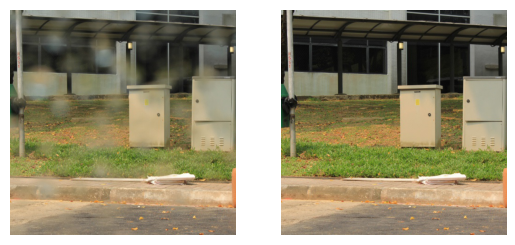

In [32]:
plt.subplot(1,2,1)
plt.imshow((rain[0, :, :, :].permute(1,2,0)+1)/2)
plt.axis(False)
plt.subplot(1,2,2)
plt.imshow((clean[0, :, :, :].permute(1,2,0)+1)/2)
plt.axis(False)

In [33]:
test = SkipVAE().to(device)
dummy = torch.rand(size=(1, 3, 480, 480)).to(device)
out, mu, logvar, mask = test(dummy)
out.shape, mu.shape, logvar.shape, mask.shape

(torch.Size([1, 3, 480, 480]),
 torch.Size([1, 256]),
 torch.Size([1, 256]),
 torch.Size([1, 1, 480, 480]))